<a href="https://colab.research.google.com/github/Arghadipkuri003/GenAi_pract./blob/main/3_Existing_generative_AI_models_and_frameworks_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring Generative AI with PyTorch

In [ ]:
pip install torch torchvision matplotlib

In [ ]:
import torch
import matplotlib.pyplot as plt

# Attempting to load without explicit sub-package imports to avoid circular dependency issues
try:
    import torchvision
    model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)
    model.eval()

    # Creating a random tensor representing a 224x224 image
    noise_image = torch.randn(1, 3, 224, 224)

    with torch.no_grad():
        output = model(noise_image)

    # visualization
    img = noise_image.squeeze().permute(1, 2, 0).numpy()
    # Normalize for display
    img = (img - img.min()) / (img.max() - img.min())

    plt.imshow(img)
    plt.title("Input Noise (ResNet18 Inference)")
    plt.axis("off")
    plt.show()

    print("Model successfully loaded and ran inference.")
except AttributeError as e:
    print(f"Caught expected error: {e}")
    print("\nTIP: This 'circular import' is a known environment issue. Please go to 'Runtime' -> 'Restart session' and run the cells again.")

Caught expected error: partially initialized module 'torchvision' has no attribute 'extension' (most likely due to a circular import)

TIP: This 'circular import' is a known environment issue. Please go to 'Runtime' -> 'Restart session' and run the cells again.


# Exploring Generative AI with TensorFlow

In [ ]:
pip install tensorflow matplotlib

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


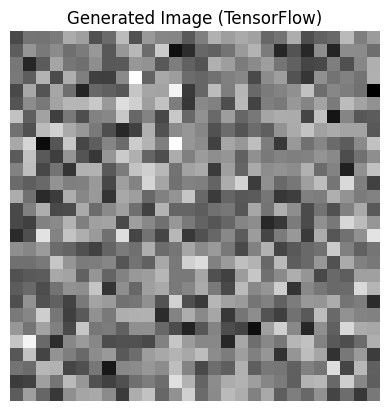

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Simple Generator Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(100,)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(784, activation='tanh'),
    tf.keras.layers.Reshape((28, 28))
])

# Generating random noise
noise = np.random.normal(0, 1, (1, 100))

generated_image = model.predict(noise)

plt.imshow(generated_image[0], cmap='gray')
plt.title("Generated Image (TensorFlow)")
plt.axis("off")
plt.show()